POSTTEST7
NAMA: Galuh Endah Pambudi
NIM: 2109106142

# Image Augmentation

import library yang diperlukan

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import os

## Image Data Generator

Membuat directory untuk data train, validation dan test

In [ ]:
TRAIN_DIR = 'Kue/train'
VAL_DIR = 'Kue/valid'
TEST_DIR = 'Kue/test'

Membuat Image Data Generator dan Flow from directory untuk data train

In [35]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=0.45,
    width_shift_range= 0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest',
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical',
)

Found 802 images belonging to 5 classes.


Membuat Image Data Generator dan Flow from directory untuk data validation

In [36]:
val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

val_generator = train_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

Found 25 images belonging to 5 classes.


Membuat Image Data Generator dan Flow from directory untuk data test

In [37]:
test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=0.45,
    width_shift_range= 0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    fill_mode='nearest',
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=8,
    shuffle=True,
    class_mode='categorical',
)

Found 25 images belonging to 5 classes.


Membuat arsitektur CNN dan DNN

In [38]:
model = tf.keras.Sequential([
    # CNN (Feature Extraction Layer)
    Conv2D(16, 3, activation='relu', input_shape=[150, 150, 3]),
    MaxPooling2D(2, 2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    # DNN (Fully Connected Layer)
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')
])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

Melatih model dengan data latih yang diberikan oleh train_generator, sekaligus memvalidasi kinerja model dengan data validasi yang diberikan oleh val_generator, selama 50 epoch, dengan informasi pelatihan ditampilkan.

In [39]:
hasil = model.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1)

Epoch 1/50
26/26 [==============================] - 18s 630ms/step - loss: 1.5978 - acc: 0.2382 - val_loss: 1.5639 - val_acc: 0.2400
Epoch 2/50
26/26 [==============================] - 30s 1s/step - loss: 1.4005 - acc: 0.4264 - val_loss: 1.5452 - val_acc: 0.3600
Epoch 3/50
26/26 [==============================] - 16s 590ms/step - loss: 1.3390 - acc: 0.4302 - val_loss: 1.4250 - val_acc: 0.3200
Epoch 4/50
26/26 [==============================] - 11s 421ms/step - loss: 1.1173 - acc: 0.5411 - val_loss: 1.3436 - val_acc: 0.5600
Epoch 5/50
26/26 [==============================] - 11s 417ms/step - loss: 1.0379 - acc: 0.5860 - val_loss: 1.2181 - val_acc: 0.6000
Epoch 6/50
26/26 [==============================] - 12s 448ms/step - loss: 1.0445 - acc: 0.5773 - val_loss: 1.3180 - val_acc: 0.4800
Epoch 7/50
26/26 [==============================] - 13s 509ms/step - loss: 0.9396 - acc: 0.6284 - val_loss: 1.4248 - val_acc: 0.4800
Epoch 8/50
26/26 [==============================] - 12s 457ms/step - los

Mengevaluasi model dengan data test yang disediakan oleh **test_generator**

In [40]:
model.evaluate(test_generator)

4/4 [==============================] - 0s 59ms/step - loss: 0.3636 - acc: 0.9200


[0.36363738775253296, 0.9200000166893005]


Mengakses metrik akurasi dan validasi dari hasil pelatihan model.

In [41]:
training_accuracy = hasil.history['acc']
validation_accuracy = hasil.history['val_acc']

Menampilkan grafik pergerakan akurasi selama pelatihan dan validasi model.

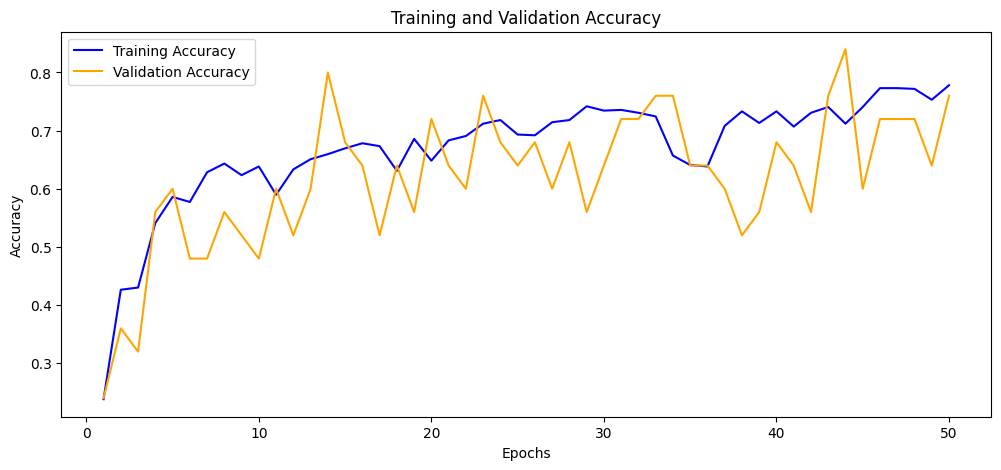

In [42]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy', color='blue')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy',  color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Menyimpan nilai loss selama pelatihan dan validasi model.

In [43]:
training_loss = hasil.history['loss']
validation_loss = hasil.history['val_loss']

Menampilkan perubahan loss selama pelatihan model dengan membandingkan data training (biru) dan data validasi (orange). Semakin rendah loss, semakin baik performa model.

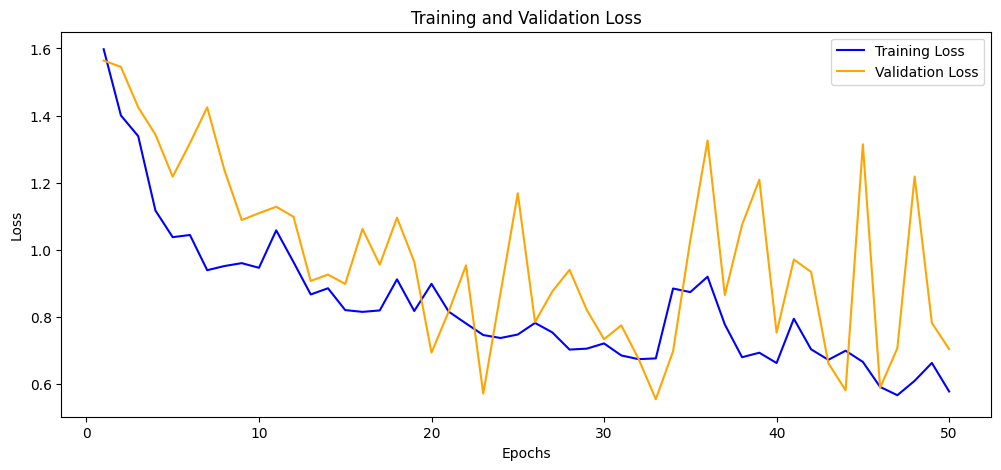

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss',  color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()